### CNN for DDoS intrusion detection

In [23]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.models import Sequential

from keras import callbacks
from keras.callbacks import CSVLogger

from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


Read and prepare dataset

In [2]:
np.random.seed(667)  # randomize

testdata = pd.read_csv("DDoS2007_spounged.csv", header=None)


#X = traindata.iloc[:,0:42]
#Y = traindata.iloc[:,0]
y_ini = testdata.iloc[:,0]
X_ini = testdata.iloc[:,1:42]

scaler = Normalizer().fit(X_ini)
X_tras = scaler.transform(X_ini) #X Transformed

# reshape input to be [samples, time steps, features]
X = np.reshape(X_tras, (X_tras.shape[0],X_tras.shape[1],1))
y = np.array(y_ini)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

CNN Structure

In [3]:
pad="same"    #same
act="relu"      #relu
l1 = 64        # 64
l2 = 128       # 128
l3 = 256       # 256
l4 = 256       # 128
l5 = 64       # 128
ker = 5       #3

cnn = Sequential()
cnn.add(Conv1D(l1,ker, padding=pad, activation=act,input_shape=(41, 1)))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Conv1D(l2,ker,  padding=pad,activation=act))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Conv1D(l3,ker,  padding=pad,activation=act))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Conv1D(l4,ker,  padding=pad,activation=act))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Flatten())
cnn.add(Dense(l5, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="sigmoid"))

# define optimizer and objective, compile cnn
cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

2023-02-16 23:16:34.564139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-16 23:16:34.564812: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-16 23:16:34.564953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-16 23:16:34.565069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-16 23:16:34.568928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Training (FIT)

In [6]:
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
21875/21875 [==============================] - 225s 10ms/step - loss: 0.3146 - accuracy: 0.8758 - val_loss: 0.2799 - val_accuracy: 0.8834
Epoch 2/10
21875/21875 [==============================] - 228s 10ms/step - loss: 0.3235 - accuracy: 0.8727 - val_loss: 0.2682 - val_accuracy: 0.8981
Epoch 3/10
21875/21875 [==============================] - 228s 10ms/step - loss: 0.3052 - accuracy: 0.8795 - val_loss: 0.2562 - val_accuracy: 0.9000
Epoch 4/10
21875/21875 [==============================] - 228s 10ms/step - loss: 0.3273 - accuracy: 0.8694 - val_loss: 0.2448 - val_accuracy: 0.8998
Epoch 5/10
21875/21875 [==============================] - 227s 10ms/step - loss: 0.3132 - accuracy: 0.8760 - val_loss: 0.2571 - val_accuracy: 0.9006
Epoch 6/10
21875/21875 [==============================] - 228s 10ms/step - loss: 0.3133 - accuracy: 0.8755 - val_loss: 0.2557 - val_accuracy: 0.8994
Epoch 7/10
21875/21875 [==============================] - 226s 10ms/step - loss: 0.3313 - accuracy: 0.8722

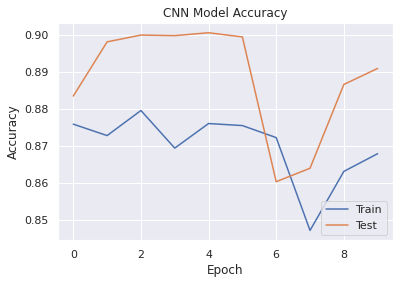

In [10]:


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BRNN Model Accuracy.png')
plt.show()



In [37]:
#Confusion matrix
# from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.grid(False)
#    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Results

In [26]:
type (y_pred)

numpy.ndarray

9376/9376 [==============================] - 30s 3ms/step
Confusion matrix, without normalization
[[185920   9391]
 [ 23329  81361]]


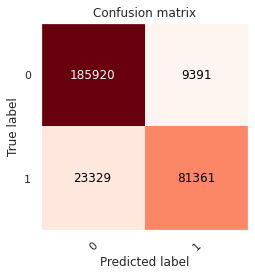

In [38]:
y_prob = cnn.predict(X_test)
y_pred = (y_prob > 0.5).astype(np.int32)
np.savetxt("cnn.txt", y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred , average="binary")
precision = precision_score(y_test, y_pred , average="binary")
f1 = f1_score(y_test, y_pred, average="binary")

class_names=np.unique(y_test)
plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix')

plt.show()


In [13]:
#EOF